## Part 1

### Loading the datasets
#### 1. Confirmed URL : https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
#### 2. Deaths URL: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
#### 3. Recovered URL: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv

#### Starting date on all three datasets is 22/01/2020

Steps (Without BeautifulSoup):-
1. Import the CSV 
2. Check if the last column title matches with the last date row in the cleaned dataset.
3. If it matches, don't add it to the dataset. 
4. If it does not match, go back iteratively until it matches and save all of the data.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
import requests
from bs4 import BeautifulSoup

In [31]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recovered_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

### Function to get the number of confirmed cases as a Dataframe

In [32]:
def get_confirmed():
    con_casesnew = pd.read_csv(confirmed_url)
    con_casesnew = con_casesnew.sum(axis=0)
    con_casesnew.drop(["Country/Region","Lat","Long"], axis=0, inplace=True)
    con_casesnew = pd.DataFrame(con_casesnew)
    con_casesnew.rename(columns={0: "Infected"}, inplace=True)
    return con_casesnew

### Function to get the number of deaths as a Dataframe

In [33]:
def get_deaths():
    deaths_new = pd.read_csv(deaths_url)
    deaths_new = deaths_new.sum(axis=0)
    deaths_new.drop(["Country/Region","Lat","Long"], axis=0, inplace=True)
    deaths_new = pd.DataFrame(deaths_new)
    deaths_new.rename(columns={0: "Deaths"}, inplace=True)
    return deaths_new

### Function to get the number of recoveries as a Dataframe

In [34]:
def get_recovered():
    rec_new = pd.read_csv(confirmed_url)
    rec_new = rec_new.sum(axis=0)
    rec_new.drop(["Country/Region","Lat","Long"], axis=0, inplace=True)
    rec_new = pd.DataFrame(rec_new)
    rec_new.rename(columns={0: "Recovered"}, inplace=True)
    return rec_new

### Scraper

In [35]:
def get_newvals():
    url_wminfo = "https://www.worldometers.info/coronavirus/"
    page = requests.get(url_wminfo)
    soup = BeautifulSoup(page.content, 'html.parser')
    result = soup.find_all("div", {"id":"maincounter-wrap"})
    numbers = []
    for r in result:
        numbers.append(int(r.text.split(':')[-1].replace(',','').replace(' ','')))
    return numbers

In [36]:
  numbers = get_newvals()
numbers

[119177, 4295, 66617]

### Fixing the dates column

In [37]:
# def_nextdate():
    

## Forecasting Confirmed Cases

In [38]:
df = get_confirmed()

In [39]:
df.tail()

,Infected
3/6/20,101799
3/7/20,105835
3/8/20,109814
3/9/20,113583
3/10/20,118582


In [40]:
close_data = df['Infected'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

cclose = close_data

In [41]:
look_back = 2

train_generator = TimeseriesGenerator(cclose, cclose, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 100
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 448ms/step - loss: 6938985223.1489
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 6878107091.4043
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 6818608643.4043
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 6755733890.0426
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 6699762164.7660
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 6612676763.9149
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 6553426430.9787
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 6485580631.8298
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 6424482444.2553
Epoch 10/100
3/3 [==============================] - 0s 12ms/step - loss: 6354339652.0851
Epoch 11/100
3/3 [==============================] - 0s 12ms/step - loss: 6292515210.2128
Epoch 12/100
3/3 [===========

3/3 [==============================] - 0s 11ms/step - loss: 810445660.2979
Epoch 94/100
3/3 [==============================] - 0s 11ms/step - loss: 767279432.0851
Epoch 95/100
3/3 [==============================] - 0s 12ms/step - loss: 729669097.1915
Epoch 96/100
3/3 [==============================] - 0s 12ms/step - loss: 696630197.7872
Epoch 97/100
3/3 [==============================] - 0s 12ms/step - loss: 670605679.7447
Epoch 98/100
3/3 [==============================] - 0s 13ms/step - loss: 636620332.8085
Epoch 99/100
3/3 [==============================] - 0s 12ms/step - loss: 600899976.3830
Epoch 100/100
3/3 [==============================] - 0s 12ms/step - loss: 570992962.8085


In [43]:
prediction = model.predict_generator(test_generator)

cclose = cclose.reshape((-1))
close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

In [44]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
num_prediction = 1
forecast = predict(num_prediction, model)
forecast = numbers[0]

In [45]:
forecast

119177

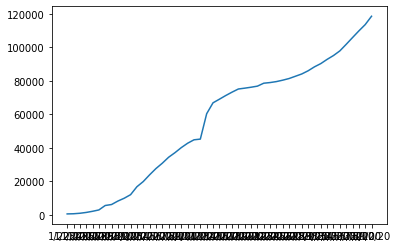

In [46]:
plt.plot(df)

In [47]:
df.tail()

,Infected
3/6/20,101799
3/7/20,105835
3/8/20,109814
3/9/20,113583
3/10/20,118582


In [48]:
forecast

119177

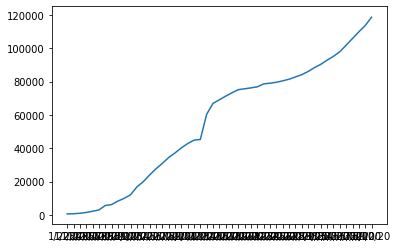

In [49]:
plt.plot(df)
plt.plot(forecast)

In [50]:
type(df.index)

pandas.core.indexes.base.Index